In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
import numpy as np
from sklearn import preprocessing
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import MinMaxScaler

from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Customer df EDA

In [3]:
customer_df = pd.read_csv('/content/drive/MyDrive/BT4012/raw dataset/Customer_DF (1).csv').drop('Unnamed: 0', axis =1 )
customer_df

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True
...,...,...,...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True
164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True
166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True


In [ ]:
# no class imbalance
customer_df['Fraud'].value_counts()

False    107
True      61
Name: Fraud, dtype: int64

In [ ]:
customer_df.describe()

,No_Transactions,No_Orders,No_Payments
count,168.000000,168.000000,168.000000
mean,3.708333,2.845238,2.035714
std,2.801527,1.981919,2.113240
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,4.000000,3.000000,1.000000
75%,5.000000,4.000000,2.000000
max,15.000000,8.000000,15.000000


In [ ]:
customer_df.info

<bound method DataFrame.info of                        customerEmail        customerPhone  \
0             josephhoward@yahoo.com         400-108-5415   
1             evansjeffery@yahoo.com       1-788-091-7546   
2          andersonwilliam@yahoo.com         024.420.0375   
3              rubenjuarez@yahoo.com   670.664.8168x94985   
4                   uchen@malone.com       1-981-877-0870   
..                               ...                  ...   
163  mitchellvickie@brewer-jones.com    313-124-3836x3528   
164                sbrown@hughes.biz  (250)632-6631x02499   
165             johnlowery@gmail.com     635.676.0955x524   
166    ethompson@jackson-sanders.com         962.300.2250   
167          dawn05@tucker-brown.com   (089)703-7360x8848   

           customerDevice                        customerIPAddress  \
0    yyeiaxpltf82440jnb3v                             8.129.104.40   
1    r0jpm7xaeqqa3kr6mzum                          219.173.211.202   
2    4m7h5ipl1shyavt6vv2r

In [ ]:
# 165 unqiue ip address. so ip address is a unique value
len(customer_df['customerIPAddress'].unique())

165

In [ ]:
# duplicated customerIPAddress - all of them are fraudulent 
customer_df[customer_df.duplicated('customerIPAddress', False)]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
46,jamescampbell@randall-pacheco.biz,599-142-6783,eaul63h9guyvwuymfn3z,45.203.99.249,"29408 Lisa Lock\nPort Jennifer, LA 26501-7040",7,3,2,True
80,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,True
88,shelby24@hotmail.com,(071)934-3315x27613,obb41ux0zfa2td5ajo9s,45.203.99.249,"3271 Cynthia Groves\nPort Jeremyberg, CO 27305",5,4,2,True
141,christinemills@mcgee.com,(651)355-4709,zbn9it3s7yl69bjtrnqf,45.203.99.249,"5156 Greene Park Apt. 748\nNew Sandra, CA 1480...",5,5,2,True


In [ ]:
# customerPhone and customerDevice are both unique
len(customer_df['customerPhone'].unique())
len(customer_df['customerDevice'].unique())

168

In [ ]:
# duplicated customerEmail are all fraudulent
# need to aggregate them to have unique customerEmail in the df
customer_df[customer_df.duplicated('customerEmail', False)]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",6,5,2,True
40,johnlowery@gmail.com,737-377-9701x577,jz66ap43id2y35ivfqa5,6c21:ac1d:2089:68fa:abb7:8c00:525f:6588,"08238 Kyle Squares Suite 893\nMillermouth, IN ...",0,0,1,True
45,johnlowery@gmail.com,+16(4)9016414340,cdx178qymd6vy77nm4x3,222.79.159.140,"77711 Pamela Ridge\nNew Kayla, IL 27182",3,2,1,True
65,johnlowery@gmail.com,04712252182,311kdz4c1210iixltk2j,42b3:df19:86fe:abd9:dafe:f6c1:eb76:c72,"11704 Andrew Villages Apt. 035\nJamesfurt, OR ...",7,5,1,True
79,johnlowery@gmail.com,1-820-539-4726x993,2in0fh7lep289n8dcbdz,163.128.139.42,"814 Wagner Union\nAshleymouth, HI 35617",2,2,1,True
133,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,True
155,johnlowery@gmail.com,076-099-0630x72770,6qy6oa3nqutsyyxzc54c,f259:657f:f329:2fca:c06c:8b57:d6ac:2380,"687 Rogers Bridge Suite 780\nValdezburgh, IN 2...",6,5,3,True
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True


In [ ]:
# duplicated customerBillingAddress are all fraudulent
customer_df[customer_df.duplicated('customerBillingAddress', False)]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
57,feliciabrown@gmail.com,(226)129-2677,z7xkuohhjbtiqs6q9rk9,115.137.171.103,49680 Brian Squares Apt. 122\nPort Walterburgh...,1,1,1,True
80,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,True
90,brittanydean@hotmail.com,06238721842,yq8xiivmx4prlgx0gofo,3517:8e52:885:8640:a59:f5fd:cb33:b06a,49680 Brian Squares Apt. 122\nPort Walterburgh...,6,4,1,True


In [ ]:
# no null values
customer_df.isnull().values.any()

False

## Histogram Distributions

### No Transactions
- skewness: 0.7237713314227632
- kurtosis: 1.0829932378822877


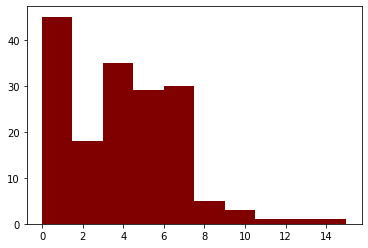

In [ ]:
plt.hist(customer_df['No_Transactions'], color ='maroon')
plt.show()

In [ ]:
customer_df['No_Transactions'].skew()

0.7237713314227632

In [ ]:
customer_df['No_Transactions'].kurtosis()

1.0829932378822877

### No Orders
- skewness: 0.23601103713094382
- kurtosis: -0.5019667178067273


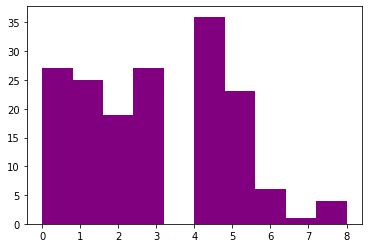

In [ ]:
plt.hist(customer_df['No_Orders'], color ='purple')
plt.show()

In [ ]:
customer_df['No_Orders'].skew()

0.23601103713094382

In [ ]:
customer_df['No_Orders'].kurtosis()

-0.5019667178067273

### No Payments
- skewness: 3.608954088652463
- kurtosis: 17.396599665646477


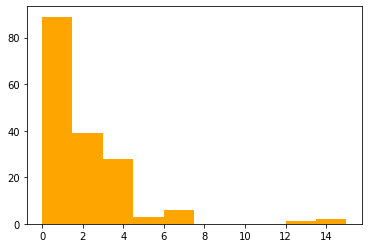

In [ ]:
plt.hist(customer_df['No_Payments'], color ='orange')
plt.show()

In [ ]:
customer_df['No_Payments'].skew()

3.608954088652463

In [ ]:
customer_df['No_Payments'].kurtosis()

17.396599665646477

### Combined: No Transactions, No Orders, No Payments

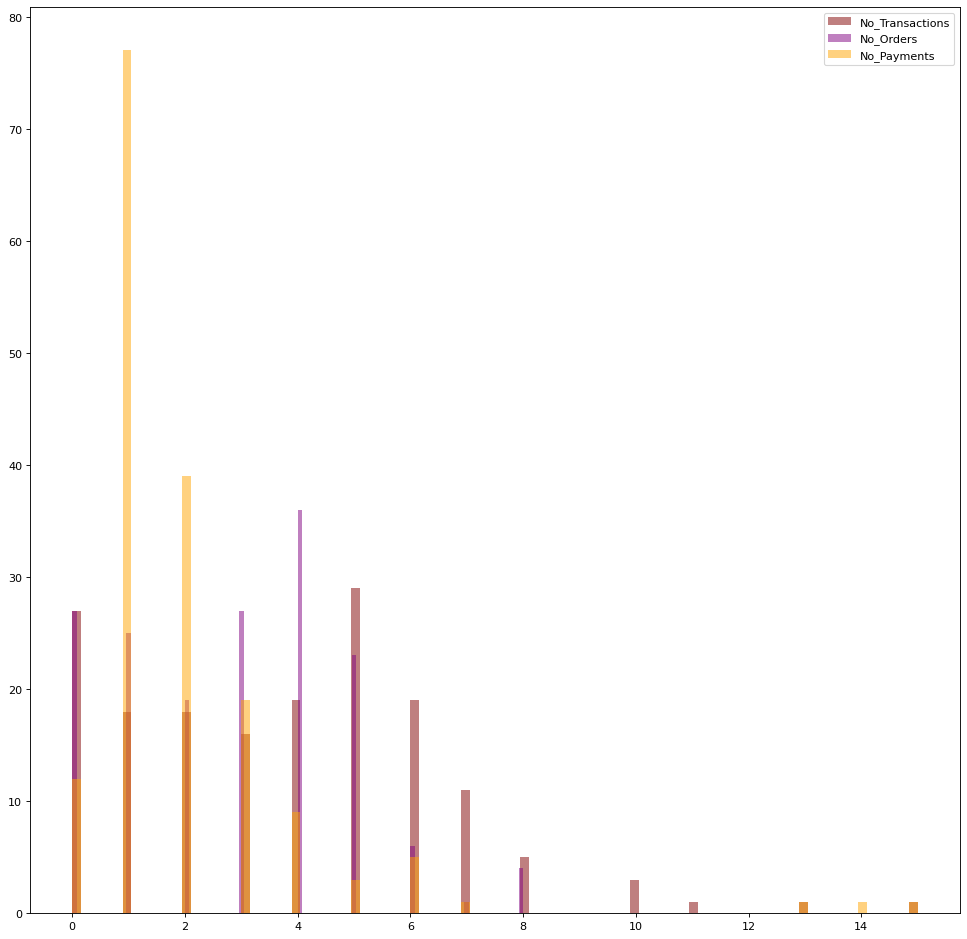

In [ ]:
No_Transactions = customer_df['No_Transactions']
No_Orders = customer_df['No_Orders']
No_Payments = customer_df['No_Payments']

kwargs = dict(alpha=0.5, bins=100)
plt.figure(figsize=(15,15), dpi= 80)

plt.hist(No_Transactions, **kwargs, color='maroon', label='No_Transactions')
plt.hist(No_Orders, **kwargs, color='purple', label='No_Orders')
plt.hist(No_Payments, **kwargs, color='orange', label='No_Payments')
plt.legend();

## Box plot

### No Transactions

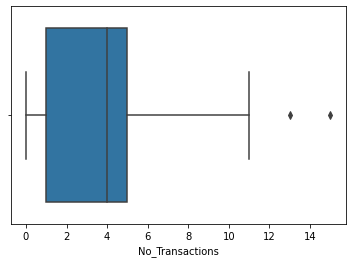

In [ ]:
sns.boxplot(x=customer_df['No_Transactions'])

### No Orders

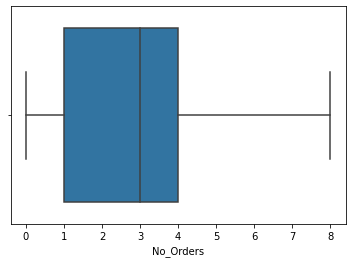

In [ ]:
sns.boxplot(x=customer_df['No_Orders'])

### No Payments

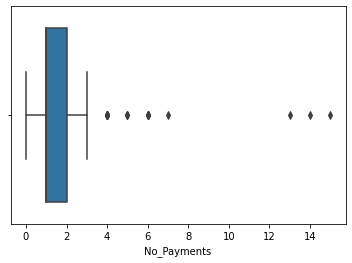

In [ ]:
sns.boxplot(x=customer_df['No_Payments'])

## One-class SVM to detect outliers


In [4]:
from sklearn.svm import OneClassSVM

In [5]:
df1 = customer_df[['No_Orders', 'No_Payments']]
df2 = customer_df[['No_Payments', 'No_Transactions']]

Text(0.5, 1.0, 'No_Orders and No_Payments')

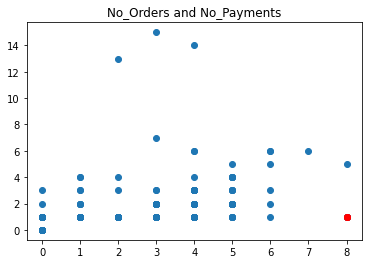

In [6]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.001)
svm.fit(df1)
y_pred = svm.predict(df1)

anomaly_values = df1.iloc[np.where(y_pred == -1)]

plt.scatter(df1['No_Orders'], df1['No_Payments'])
plt.scatter(anomaly_values['No_Orders'], anomaly_values['No_Payments'], c = "r")
plt.title("No_Orders and No_Payments")

Text(0.5, 1.0, 'No_Payments and No_Transactions')

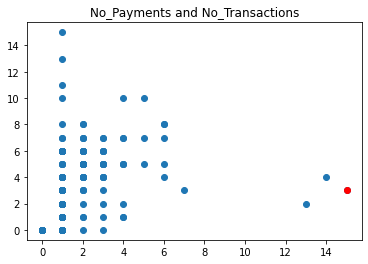

In [7]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.001)
svm.fit(df2)
y_pred = svm.predict(df2)

anomaly_values = df2.iloc[np.where(y_pred == -1)]

plt.scatter(df2['No_Payments'], df2['No_Transactions'])
plt.scatter(anomaly_values['No_Payments'], anomaly_values['No_Transactions'], c = "r")
plt.title("No_Payments and No_Transactions")

## Geographical 

### Billing Address
- Extracting useful data from the billing addresss

In [ ]:
def process_billing_addr(addr):
  final_list = addr.split("\n")[1].split(" ")
  for i in final_list:
    if len(i) == 2:
      return i
  return None

customer_df["customerBillingAddressRegion"] = customer_df["customerBillingAddress"].apply(process_billing_addr)

In [ ]:
customer_df

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,CA
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,NM
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,PR
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,FM
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,TN
...,...,...,...,...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True,OR
164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True,AZ
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True,OK
166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True,IL


In [ ]:
customer_df["customerBillingAddressRegion"].unique()

array(['CA', 'NM', 'PR', 'FM', 'TN', 'OR', 'AR', 'WI', 'AE', 'ID', 'MN',
       'DC', 'ND', 'IL', 'SD', 'NH', 'MH', 'WY', 'GU', 'NE', 'UT', 'AA',
       'CT', 'DE', 'LA', 'VA', 'KY', 'SC', 'MT', 'AS', 'IN', 'IA', 'NC',
       'MS', 'AL', 'ME', 'AZ', 'KS', 'MO', 'NV', 'OH', 'AP', 'PA', 'WA',
       'GA', 'HI', 'VT', 'OK', 'VI', 'FL', 'CO', 'WV', 'MA', 'AK', 'MP',
       'NJ', 'PW'], dtype=object)

In [ ]:
len(customer_df["customerBillingAddressRegion"].unique())

57

In [ ]:
customer_df[["Fraud", "customerBillingAddressRegion","customerEmail"]].groupby(["customerBillingAddressRegion", "Fraud"]).count()

customerEmail
customerBillingAddressRegion Fraud               
AA                           False              2
                             True               1
AE                           False              5
AK                           True               1
AL                           False              2
...                                           ...
WA                           True               1
WI                           False              1
                             True               1
WV                           True               2
WY                           False              2

[91 rows x 1 columns]

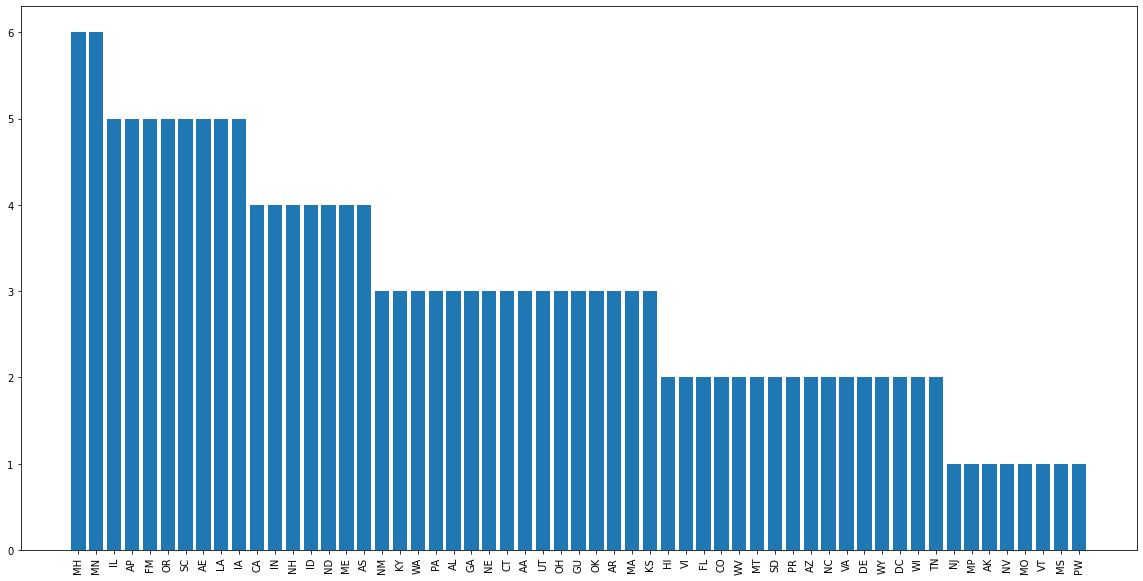

In [ ]:
ip_billing_region_df = customer_df["customerBillingAddressRegion"].value_counts().to_frame().reset_index()
ip_billing_region_df
plt.rcParams["figure.figsize"] = (20,10)

plt.bar(ip_billing_region_df["index"], ip_billing_region_df["customerBillingAddressRegion"])
plt.xticks(rotation='vertical')
plt.show()

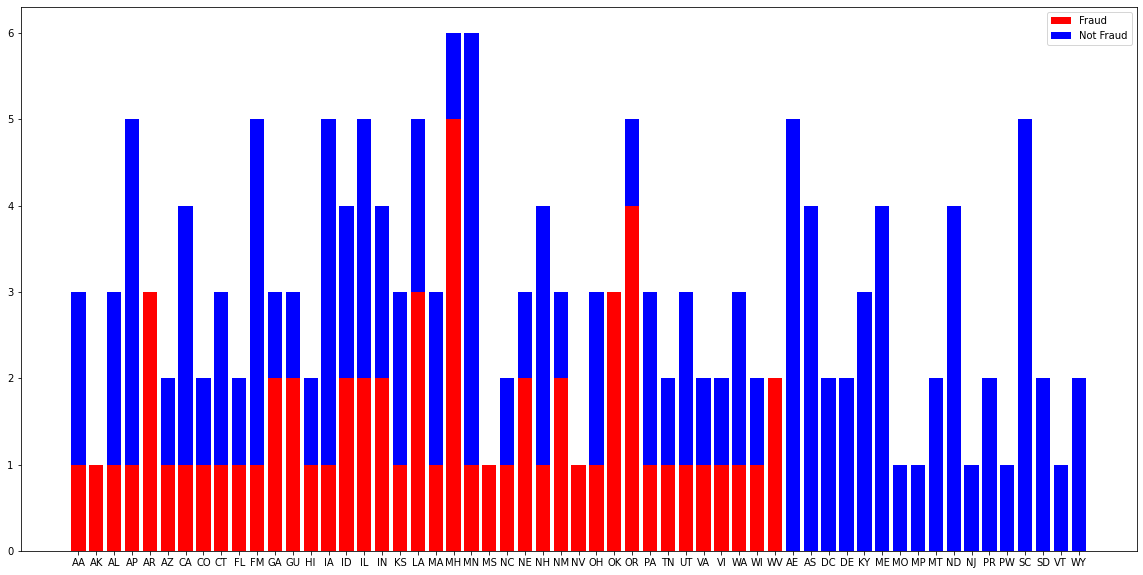

In [ ]:
freq_by_region_fraud = customer_df[["Fraud", "customerBillingAddressRegion","customerEmail"]].groupby(["customerBillingAddressRegion", "Fraud"]).count()
freq_by_region_fraud = freq_by_region_fraud.reset_index()

false_by_region = freq_by_region_fraud[freq_by_region_fraud["Fraud"]==False]
true_by_region = freq_by_region_fraud[freq_by_region_fraud["Fraud"]==True]
freq_by_region = true_by_region.merge(false_by_region, how="outer", on="customerBillingAddressRegion")
freq_by_region = freq_by_region.drop(["Fraud_x", "Fraud_y"], axis = 1)
freq_by_region = freq_by_region.rename(columns={"customerEmail_x": "Fraud", "customerEmail_y": "Not Fraud"})
freq_by_region = freq_by_region.fillna(0)
freq_by_region 

plt.bar(freq_by_region["customerBillingAddressRegion"], freq_by_region["Fraud"], color='r')
plt.bar(freq_by_region["customerBillingAddressRegion"], freq_by_region["Not Fraud"], bottom=freq_by_region["Fraud"], color='b')
plt.legend(["Fraud", "Not Fraud"])
plt.show()

The current customerBillingAddressRegion has very high cardinality.
To reduce the cardinality, we categorise the state code (customerBillingAddressRegion) into their regions based on the information from wikipedia. Some states are not categorised into any of the regions. They are labelled as Others.

References:
- https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971
- https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#Census_Bureau-designated_regions_and_divisions

In [ ]:
us_regions = pd.read_csv("/content/drive/MyDrive/BT4012/raw dataset/US States and Regions.csv")

In [ ]:
customer_df = pd.merge(customer_df, us_regions, left_on = "customerBillingAddressRegion", right_on = "State", how="left")
len(customer_df[customer_df.State.isna()]["customerBillingAddressRegion"])

37

In [ ]:
# not in the list in wikipedia (set to NaN)
customer_df[customer_df.State.isna()]["customerBillingAddressRegion"].unique()

array(['PR', 'FM', 'AE', 'MH', 'GU', 'AA', 'AS', 'AP', 'VI', 'MP', 'PW'],
      dtype=object)

In [ ]:
customer_df["Region"].value_counts()

South        40
Midwest      38
West         34
Northeast    19
Name: Region, dtype: int64

In [ ]:
customer_df.drop(["customerBillingAddress", "customerBillingAddressRegion", "State"], axis = 1, inplace= True)

In [ ]:
customer_df.rename(columns = {"Region": "customerBillingAddressRegion"}, inplace = True)

In [ ]:
# convert None to Others 
customer_df["customerBillingAddressRegion"] = customer_df["customerBillingAddressRegion"].fillna("Others")

In [ ]:
customer_df["customerBillingAddressRegion"].unique()

array(['West', 'Others', 'South', 'Midwest', 'Northeast'], dtype=object)

In [ ]:
customer_df[["Fraud", "customerBillingAddressRegion","customerEmail"]].groupby(["customerBillingAddressRegion", "Fraud"]).count()

customerEmail
customerBillingAddressRegion Fraud               
Midwest                      False             27
                             True              11
Northeast                    False             15
                             True               4
Others                       False             26
                             True              11
South                        False             21
                             True              19
West                         False             18
                             True              16

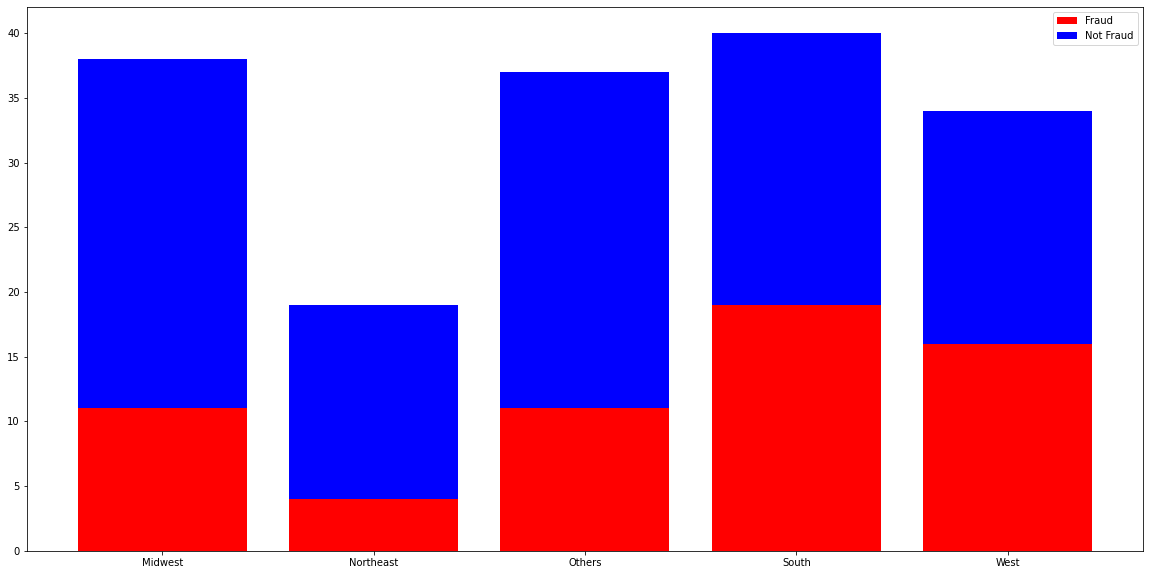

In [ ]:
freq_by_region_fraud = customer_df[["Fraud", "customerBillingAddressRegion","customerEmail"]].groupby(["customerBillingAddressRegion", "Fraud"]).count()
freq_by_region_fraud = freq_by_region_fraud.reset_index()

false_by_region = freq_by_region_fraud[freq_by_region_fraud["Fraud"]==False]
true_by_region = freq_by_region_fraud[freq_by_region_fraud["Fraud"]==True]
freq_by_region = true_by_region.merge(false_by_region, how="outer", on="customerBillingAddressRegion")
freq_by_region = freq_by_region.drop(["Fraud_x", "Fraud_y"], axis = 1)
freq_by_region = freq_by_region.rename(columns={"customerEmail_x": "Fraud", "customerEmail_y": "Not Fraud"})
freq_by_region = freq_by_region.fillna(0)
freq_by_region 

plt.bar(freq_by_region["customerBillingAddressRegion"], freq_by_region["Fraud"], color='r')
plt.bar(freq_by_region["customerBillingAddressRegion"], freq_by_region["Not Fraud"], bottom=freq_by_region["Fraud"], color='b')
plt.legend(["Fraud", "Not Fraud"])
plt.show()

### ip address

As the ip addresses are almost unique, they are useless on its own. We extracted the ip addresses' countries, cities and regions from the IP API 

In [ ]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests

def get_location(ip_address):
    response = requests.get(f'https://ipapi.co/{ip_address}/json/').json()
    location_data = {
        "ip": ip_address,
        "city": response.get("city"),
        "region": response.get("region"),
        "country": response.get("country_name")
    }
    return location_data

In [ ]:
customer_df["ip_location_data"] = customer_df["customerIPAddress"].apply(get_location)
customer_df["ip_city"] = customer_df["ip_location_data"].apply(lambda x: x["city"])
customer_df["ip_region"] = customer_df["ip_location_data"].apply(lambda x: x["region"])
customer_df["ip_country"] = customer_df["ip_location_data"].apply(lambda x: x["country"])

In [ ]:
customer_df = customer_df.drop("ip_location_data", axis=1)
customer_df

,customerEmail,customerPhone,customerDevice,customerIPAddress,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion,ip_city,ip_region,ip_country
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,2,2,1,False,West,Shenzhen,Guangdong,China
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,3,3,7,True,West,Minato-ku,Tokyo,Japan
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,5,3,2,False,Others,Murten/Morat,Fribourg,Switzerland
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,3,3,1,False,Others,Murten/Morat,Fribourg,Switzerland
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,7,7,6,True,South,Tétouan,Tanger-Tetouan-Al Hoceima,Morocco
...,...,...,...,...,...,...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,3,3,1,True,West,None,None,None
164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,6,5,3,True,West,None,None,None
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,4,4,2,True,South,Murten/Morat,Fribourg,Switzerland
166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,8,6,6,True,Midwest,Naju-si,Jeollanam-do,South Korea


In [ ]:
# None values
customer_df[customer_df["ip_country"].isna()][["customerIPAddress", "Fraud", "ip_country"]]

,customerIPAddress,Fraud,ip_country
10,231.91.253.19,True,None
15,229.2.225.188,True,None
23,245.38.171.222,True,None
24,89e:31aa:e9e2:90ea:aa00:4a8c:805c:20ea,False,None
29,1289:d2a9:c65d:8fc7:7be4:129b:d7b:cf7b,True,None
...,...,...,...
161,d89c:db0:5ff9:a150:9e6c:482d:c900:fb33,True,None
162,2be:a4d5:eb39:fa22:2650:83d5:917f:5f23,False,None
163,181.90.104.120,True,None
164,16.166.2.0,True,None


#### IP address: country

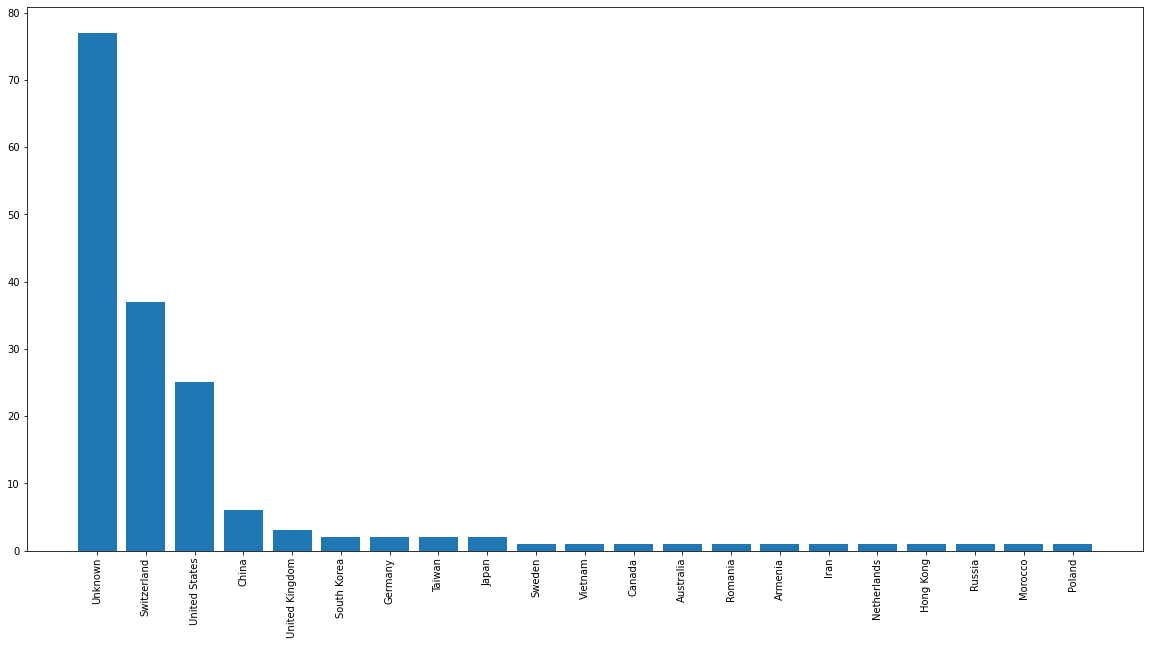

In [ ]:
customer_df["ip_country"] = customer_df["ip_country"].fillna("Unknown")
ip_country_df = customer_df["ip_country"].value_counts().to_frame().reset_index()
# customer_df["ip_country"].value_counts().axes
# customer_df["ip_country"].value_counts().values
plt.bar(ip_country_df["index"], ip_country_df["ip_country"])
plt.xticks(rotation='vertical')
plt.show()

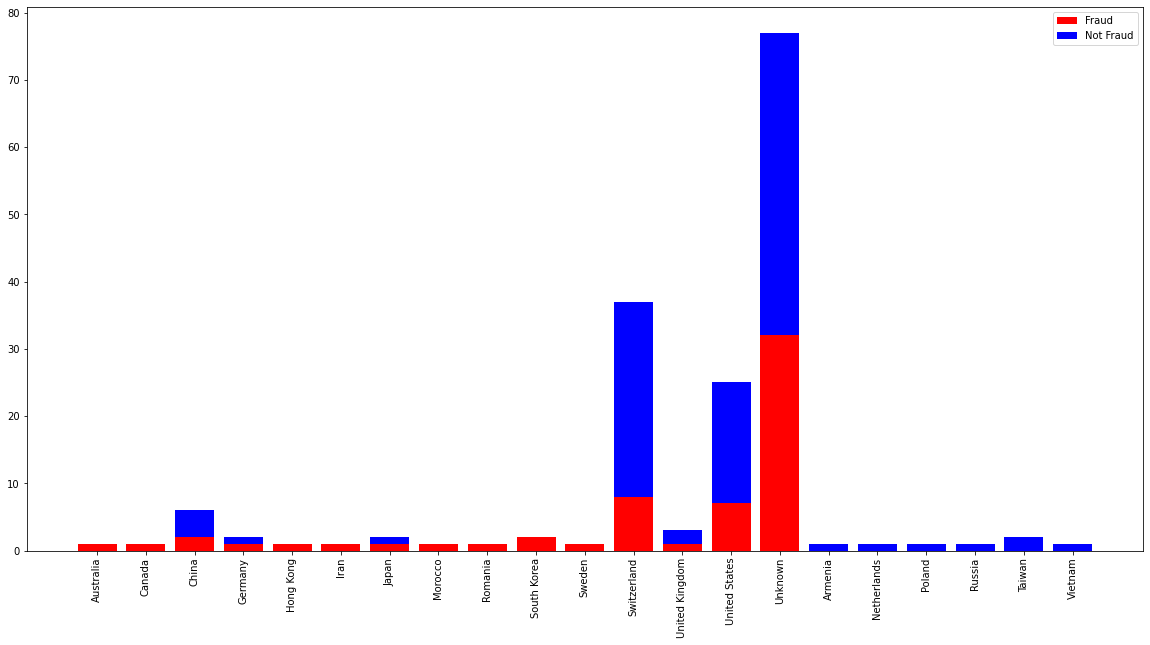

In [ ]:
freq_by_ip_country_fraud = customer_df[["Fraud", "ip_country","customerEmail"]].groupby(["ip_country", "Fraud"]).count()
freq_by_ip_country_fraud = freq_by_ip_country_fraud.reset_index()

false_by_ip_country = freq_by_ip_country_fraud[freq_by_ip_country_fraud["Fraud"]==False]
true_by_ip_country = freq_by_ip_country_fraud[freq_by_ip_country_fraud["Fraud"]==True]
freq_by_ip_country = true_by_ip_country.merge(false_by_ip_country, how="outer", on="ip_country")
freq_by_ip_country = freq_by_ip_country.drop(["Fraud_x", "Fraud_y"], axis = 1)
freq_by_ip_country = freq_by_ip_country.rename(columns={"customerEmail_x": "Fraud", "customerEmail_y": "Not Fraud"})
freq_by_ip_country = freq_by_ip_country.fillna(0)
freq_by_ip_country 

plt.bar(freq_by_ip_country["ip_country"], freq_by_ip_country["Fraud"], color='r')
plt.bar(freq_by_ip_country["ip_country"], freq_by_ip_country["Not Fraud"], bottom=freq_by_ip_country["Fraud"], color='b')
plt.legend(["Fraud", "Not Fraud"])
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
customer_df["ip_country"].nunique()

21

#### IP address: region

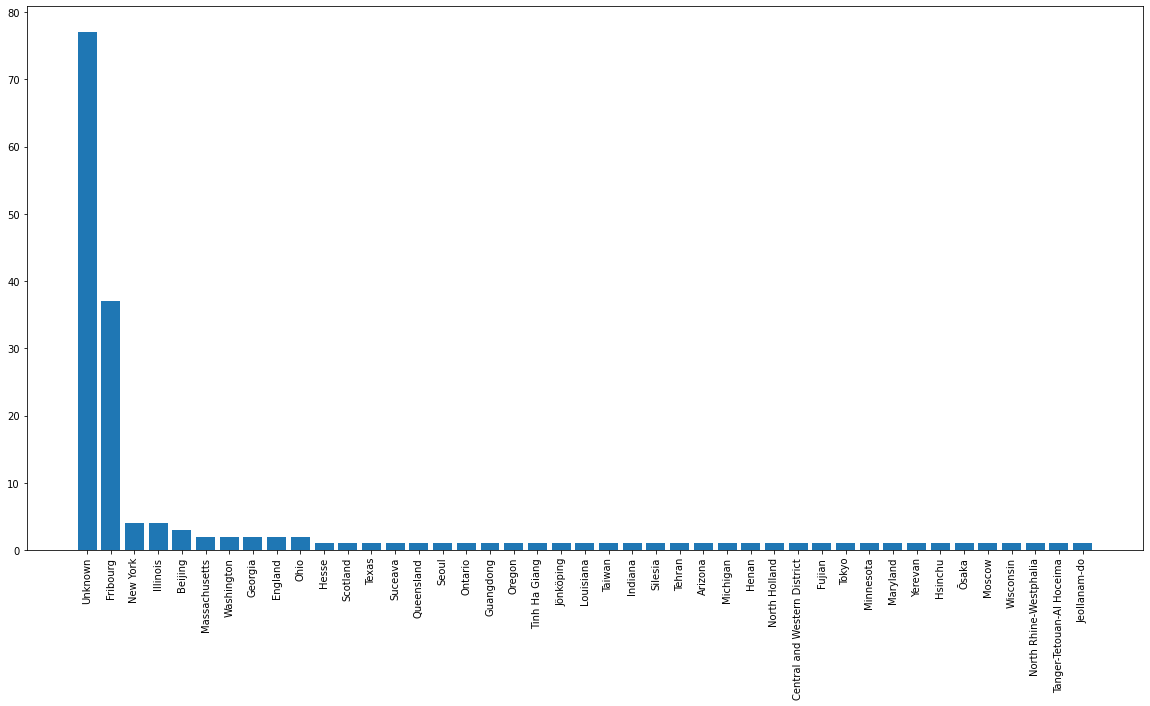

In [ ]:
customer_df["ip_region"] = customer_df["ip_region"].fillna("Unknown")
ip_region_df = customer_df["ip_region"].value_counts().to_frame().reset_index()

plt.bar(ip_region_df["index"], ip_region_df["ip_region"])
plt.xticks(rotation='vertical')
plt.show()

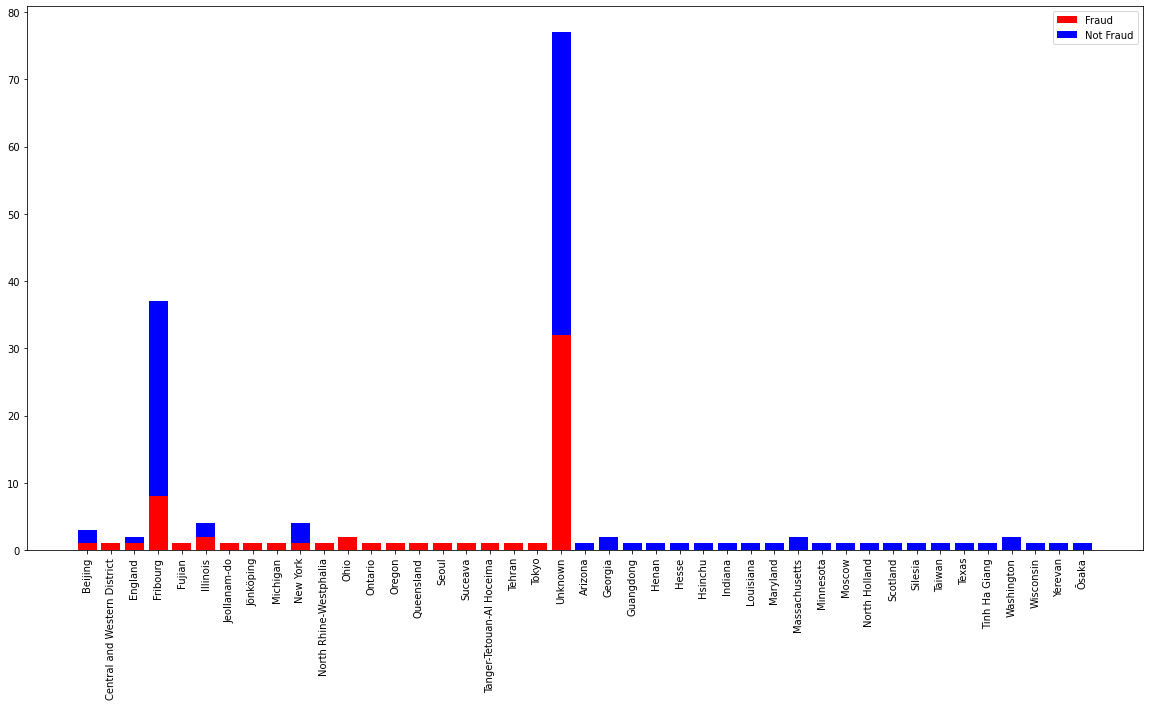

In [ ]:
freq_by_ip_region_fraud = customer_df[["Fraud", "ip_region","customerEmail"]].groupby(["ip_region", "Fraud"]).count()
freq_by_ip_region_fraud = freq_by_ip_region_fraud.reset_index()

false_by_ip_region = freq_by_ip_region_fraud[freq_by_ip_region_fraud["Fraud"]==False]
true_by_ip_region = freq_by_ip_region_fraud[freq_by_ip_region_fraud["Fraud"]==True]
freq_by_ip_region = true_by_ip_region.merge(false_by_ip_region, how="outer", on="ip_region")
freq_by_ip_region = freq_by_ip_region.drop(["Fraud_x", "Fraud_y"], axis = 1)
freq_by_ip_region = freq_by_ip_region.rename(columns={"customerEmail_x": "Fraud", "customerEmail_y": "Not Fraud"})
freq_by_ip_region = freq_by_ip_region.fillna(0)
freq_by_ip_region 

plt.bar(freq_by_ip_region["ip_region"], freq_by_ip_region["Fraud"], color='r')
plt.bar(freq_by_ip_region["ip_region"], freq_by_ip_region["Not Fraud"], bottom=freq_by_ip_region["Fraud"], color='b')
plt.legend(["Fraud", "Not Fraud"])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
customer_df["ip_region"].nunique()

43

#### IP address: city

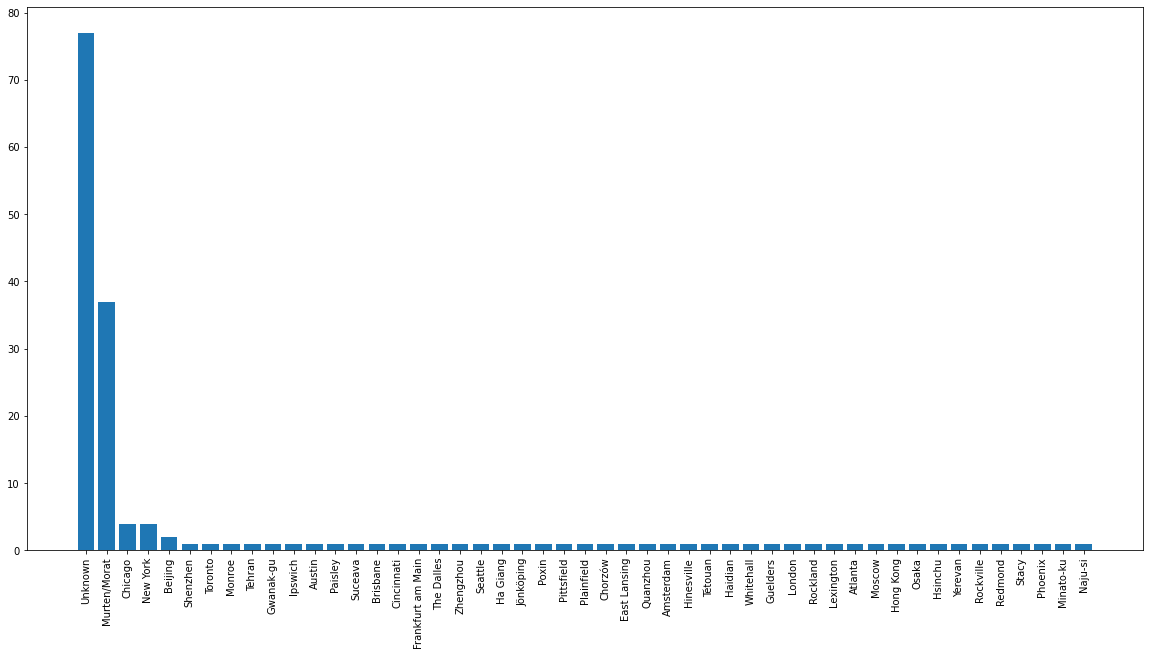

In [ ]:
customer_df["ip_city"] = customer_df["ip_city"].fillna("Unknown")
ip_city_df = customer_df["ip_city"].value_counts().to_frame().reset_index()

plt.bar(ip_city_df["index"], ip_city_df["ip_city"])
plt.xticks(rotation='vertical')
plt.show()

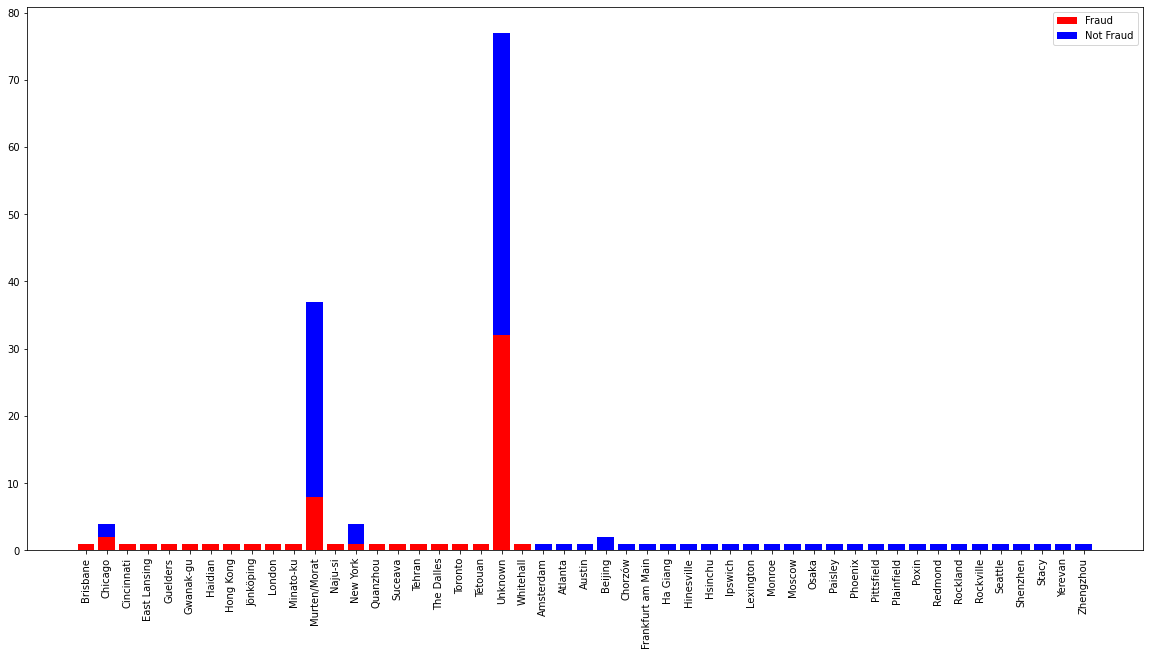

In [ ]:
freq_by_ip_city_fraud = customer_df[["Fraud", "ip_city","customerEmail"]].groupby(["ip_city", "Fraud"]).count()
freq_by_ip_city_fraud = freq_by_ip_city_fraud.reset_index()

false_by_ip_city = freq_by_ip_city_fraud[freq_by_ip_city_fraud["Fraud"]==False]
true_by_ip_city = freq_by_ip_city_fraud[freq_by_ip_city_fraud["Fraud"]==True]
freq_by_ip_city = true_by_ip_city.merge(false_by_ip_city, how="outer", on="ip_city")
freq_by_ip_city = freq_by_ip_city.drop(["Fraud_x", "Fraud_y"], axis = 1)
freq_by_ip_city = freq_by_ip_city.rename(columns={"customerEmail_x": "Fraud", "customerEmail_y": "Not Fraud"})
freq_by_ip_city = freq_by_ip_city.fillna(0)
freq_by_ip_city

plt.bar(freq_by_ip_city["ip_city"], freq_by_ip_city["Fraud"], color='r')
plt.bar(freq_by_ip_city["ip_city"], freq_by_ip_city["Not Fraud"], bottom=freq_by_ip_city["Fraud"], color='b')
plt.legend(["Fraud", "Not Fraud"])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
customer_df["ip_city"].nunique()

49

#### Remove region and city
Due to high cardinality

In [ ]:
## to remove ip city and ip region due to very high cardinality
customer_df.drop(["ip_region", "ip_city"], axis = 1, inplace = True)

In [ ]:
customer_df

,customerEmail,customerPhone,customerDevice,customerIPAddress,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion,ip_country
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,2,2,1,False,West,China
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,3,3,7,True,West,Japan
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,5,3,2,False,Others,Switzerland
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,3,3,1,False,Others,Switzerland
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,7,7,6,True,South,Morocco
...,...,...,...,...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,3,3,1,True,West,Unknown
164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,6,5,3,True,West,Unknown
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,4,4,2,True,South,Switzerland
166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,8,6,6,True,Midwest,South Korea


### Relationship

In [ ]:
customer_df.columns

Index(['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'No_Transactions', 'No_Orders', 'No_Payments', 'Fraud',
       'customerBillingAddressRegion', 'ip_country'],
      dtype='object')

In [ ]:
customer_df.head(5)

,customerEmail,customerPhone,customerDevice,customerIPAddress,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion,ip_country
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,2,2,1,False,West,China
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,3,3,7,True,West,Japan
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,5,3,2,False,Others,Switzerland
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,3,3,1,False,Others,Switzerland
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,7,7,6,True,South,Morocco


#### Correlation heatmap
- No_transactions and No_orders are highly correlated (0.89)

In [ ]:
numerical_df = customer_df[['No_Transactions', 'No_Orders', 'No_Payments']]


Text(0.5, 1.0, 'Correlation Heatmap')

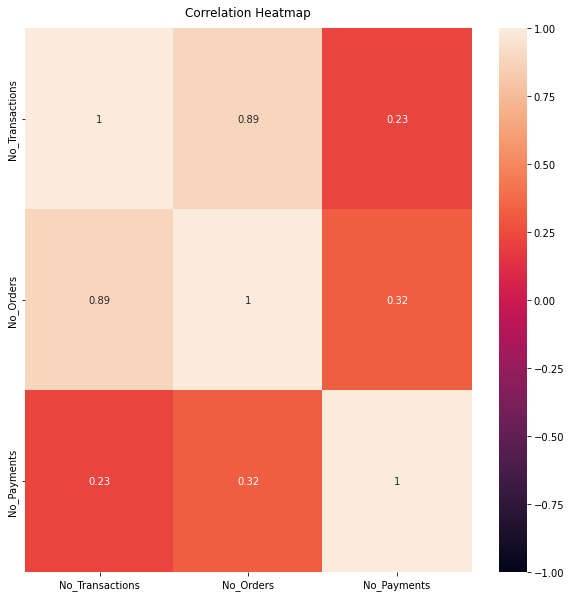

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(numerical_df.corr(), vmin=-1, vmax=1, annot=True, ax = ax).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#### Point Biserial Correlation
- Look at the relationship between binary and continuous data

In [ ]:
continuous_df = customer_df[['No_Transactions', 'No_Orders', 'No_Payments']]
binary_df = customer_df[['Fraud']]


biserialcorr_df = pd.DataFrame(columns=continuous_df.columns, index=binary_df.columns)


for i in binary_df.columns:
  lst = []
  for z in continuous_df.columns:
    lst.append(pointbiserialr(binary_df[i], continuous_df[z])[0])
  biserialcorr_df.loc[i] = lst

biserialcorr_df

,No_Transactions,No_Orders,No_Payments
Fraud,0.136451,0.234528,0.357312


#### Cramer V Correlation
- Look at the relationship between categorical data
- 0 to 1 (1 = perfect association)

In [ ]:
customer_df_encode = customer_df.copy()
le = preprocessing.LabelEncoder()
customer_df_encode['Fraud'] = le.fit_transform(customer_df_encode['Fraud'])

customer_df_encode = customer_df_encode.join(pd.get_dummies(customer_df["customerBillingAddressRegion"], prefix = 'BillingRegion'))

customer_df_encode = customer_df_encode.join(pd.get_dummies(customer_df["ip_country"], prefix = 'ipCountry'))
customer_df_encode

,customerEmail,customerPhone,customerDevice,customerIPAddress,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion,ip_country,...,ipCountry_Romania,ipCountry_Russia,ipCountry_South Korea,ipCountry_Sweden,ipCountry_Switzerland,ipCountry_Taiwan,ipCountry_United Kingdom,ipCountry_United States,ipCountry_Unknown,ipCountry_Vietnam
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,2,2,1,0,West,China,...,0,0,0,0,0,0,0,0,0,0
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,3,3,7,1,West,Japan,...,0,0,0,0,0,0,0,0,0,0
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,5,3,2,0,Others,Switzerland,...,0,0,0,0,1,0,0,0,0,0
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,3,3,1,0,Others,Switzerland,...,0,0,0,0,1,0,0,0,0,0
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,7,7,6,1,South,Morocco,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,3,3,1,1,West,Unknown,...,0,0,0,0,0,0,0,0,1,0
164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,6,5,3,1,West,Unknown,...,0,0,0,0,0,0,0,0,1,0
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,4,4,2,1,South,Switzerland,...,0,0,0,0,1,0,0,0,0,0
166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,8,6,6,1,Midwest,South Korea,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
categorical_df = customer_df_encode.iloc[:, 10:]
categorical_df = categorical_df.join(customer_df_encode[["Fraud"]])
categorical_df.columns


Index(['BillingRegion_Midwest', 'BillingRegion_Northeast',
       'BillingRegion_Others', 'BillingRegion_South', 'BillingRegion_West',
       'ipCountry_Armenia', 'ipCountry_Australia', 'ipCountry_Canada',
       'ipCountry_China', 'ipCountry_Germany', 'ipCountry_Hong Kong',
       'ipCountry_Iran', 'ipCountry_Japan', 'ipCountry_Morocco',
       'ipCountry_Netherlands', 'ipCountry_Poland', 'ipCountry_Romania',
       'ipCountry_Russia', 'ipCountry_South Korea', 'ipCountry_Sweden',
       'ipCountry_Switzerland', 'ipCountry_Taiwan', 'ipCountry_United Kingdom',
       'ipCountry_United States', 'ipCountry_Unknown', 'ipCountry_Vietnam',
       'Fraud'],
      dtype='object')

In [ ]:
categorical_df.head(5)

,BillingRegion_Midwest,BillingRegion_Northeast,BillingRegion_Others,BillingRegion_South,BillingRegion_West,ipCountry_Armenia,ipCountry_Australia,ipCountry_Canada,ipCountry_China,ipCountry_Germany,...,ipCountry_Russia,ipCountry_South Korea,ipCountry_Sweden,ipCountry_Switzerland,ipCountry_Taiwan,ipCountry_United Kingdom,ipCountry_United States,ipCountry_Unknown,ipCountry_Vietnam,Fraud
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [ ]:
rows= []

for var1 in categorical_df:
  col = []
  for var2 in categorical_df :
    cramers =cramers_V(categorical_df[var1], categorical_df[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
cramer_df = pd.DataFrame(cramers_results, columns = categorical_df.columns, index =categorical_df.columns)

cramer_df

,BillingRegion_Midwest,BillingRegion_Northeast,BillingRegion_Others,BillingRegion_South,BillingRegion_West,ipCountry_Armenia,ipCountry_Australia,ipCountry_Canada,ipCountry_China,ipCountry_Germany,...,ipCountry_Russia,ipCountry_South Korea,ipCountry_Sweden,ipCountry_Switzerland,ipCountry_Taiwan,ipCountry_United Kingdom,ipCountry_United States,ipCountry_Unknown,ipCountry_Vietnam,Fraud
BillingRegion_Midwest,0.97,0.03,0.07,0.08,0.06,0.00,0.00,0.00,0.00,0.02,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
BillingRegion_Northeast,0.03,0.94,0.03,0.03,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01
BillingRegion_Others,0.07,0.03,0.97,0.08,0.06,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
BillingRegion_South,0.08,0.03,0.08,0.97,0.07,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
BillingRegion_West,0.06,0.02,0.06,0.07,0.96,0.00,0.00,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.01
ipCountry_Armenia,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ipCountry_Australia,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ipCountry_Canada,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ipCountry_China,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.83,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00
ipCountry_Germany,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Text(0.5, 1.0, 'Correlation Heatmap')

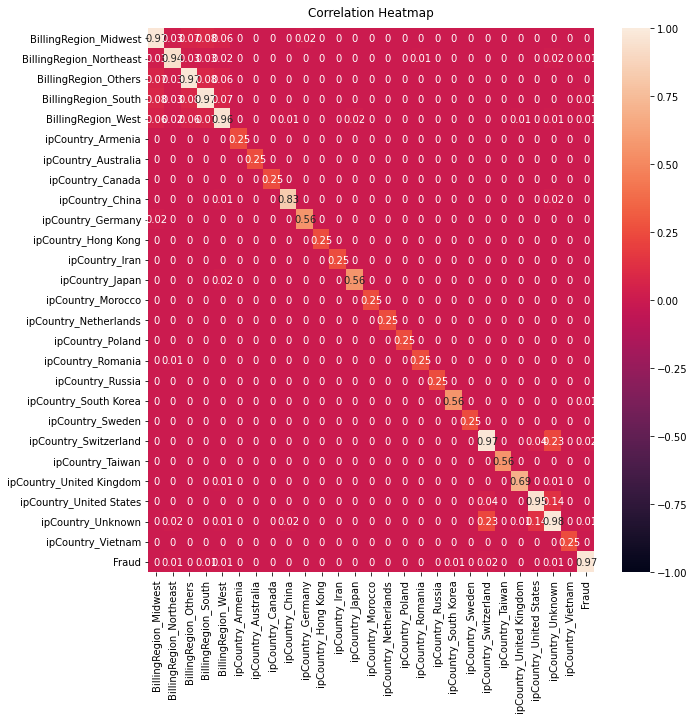

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cramer_df, vmin=-1, vmax=1, annot=True, ax = ax).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# Cust Transaction Details EDA

In [ ]:
cust_transaction_details = pd.read_csv("/content/drive/MyDrive/BT4012/raw dataset/cust_transaction_details (1).csv").drop('Unnamed: 0', axis = 1)

In [ ]:
cust_transaction_details.head(5)

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [ ]:
cust_transaction_details.shape

(623, 10)

In [ ]:
cust_transaction_details.isnull().any()

customerEmail                       False
transactionId                       False
orderId                             False
paymentMethodId                     False
paymentMethodRegistrationFailure    False
paymentMethodType                   False
paymentMethodProvider               False
transactionAmount                   False
transactionFailed                   False
orderState                          False
dtype: bool

In [ ]:
cust_transaction_details.describe()

,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,623.000000,623.000000,623.000000
mean,0.131621,34.598716,0.269663
std,0.338350,20.360247,0.444141
min,0.000000,10.000000,0.000000
25%,0.000000,21.000000,0.000000
50%,0.000000,34.000000,0.000000
75%,0.000000,45.000000,1.000000
max,1.000000,353.000000,1.000000


In [ ]:
cust_transaction_details.dtypes

customerEmail                       object
transactionId                       object
orderId                             object
paymentMethodId                     object
paymentMethodRegistrationFailure     int64
paymentMethodType                   object
paymentMethodProvider               object
transactionAmount                    int64
transactionFailed                    int64
orderState                          object
dtype: object

In [ ]:
len(cust_transaction_details['customerEmail'].unique())

136

In [ ]:
# unique transaction id
len(cust_transaction_details['transactionId'].unique())

623

In [ ]:
len(cust_transaction_details['orderId'].unique())

478

In [ ]:
len(cust_transaction_details['paymentMethodId'].unique())

237

In [ ]:
# one order id can have multiple transactions
cust_transaction_details[cust_transaction_details.duplicated('orderId', False)]

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
6,andersonwilliam@yahoo.com,3alf9irw,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,1,fulfilled
7,andersonwilliam@yahoo.com,69w9wymx,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,0,fulfilled
8,andersonwilliam@yahoo.com,pegqc4ud,itnk8y,dluy3jka0,0,card,Discover,25,1,fulfilled
9,andersonwilliam@yahoo.com,uo3slwh7,itnk8y,8pneoi03z,0,card,JCB 16 digit,25,0,fulfilled
21,samuel15@saunders-rhodes.com,9jutaun8,sq7rk9,je76d0ulj,0,apple pay,VISA 13 digit,40,1,fulfilled
...,...,...,...,...,...,...,...,...,...,...
611,ethompson@jackson-sanders.com,piabwn96,cbxamb,1tmkeoxbm,0,card,American Express,37,0,fulfilled
612,ethompson@jackson-sanders.com,yneqvvwj,cbxamb,pj3k9zcc7,0,bitcoin,JCB 16 digit,37,1,fulfilled
618,dawn05@tucker-brown.com,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled
619,dawn05@tucker-brown.com,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled


In [ ]:
cust_transaction_details['orderState'].unique()

array(['pending', 'fulfilled', 'failed'], dtype=object)

In [ ]:
cust_transaction_details['paymentMethodProvider'].unique()

array(['JCB 16 digit', 'American Express', 'VISA 16 digit', 'Discover',
       'Voyager', 'VISA 13 digit', 'Maestro', 'Mastercard',
       'Diners Club / Carte Blanche', 'JCB 15 digit'], dtype=object)

In [ ]:
cust_transaction_details['paymentMethodType'].unique()

array(['card', 'bitcoin', 'apple pay', 'paypal'], dtype=object)

In [ ]:
cust_transaction_details.groupby("orderState").count()["customerEmail"]

orderState
failed        63
fulfilled    516
pending       44
Name: customerEmail, dtype: int64

## Histogram Distributions

### Transaction Amount
- skewness: 6.32042419168886
- kurtosis: 95.01233890217334


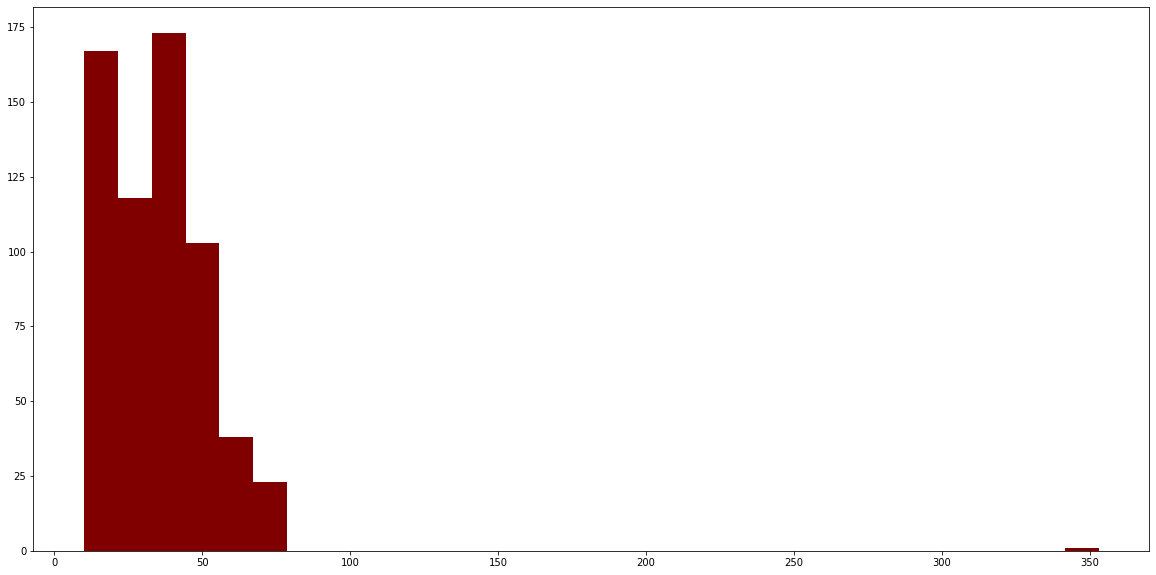

In [ ]:
plt.hist(cust_transaction_details['transactionAmount'], color ='maroon', bins = 30)
plt.show()

In [ ]:
cust_transaction_details['transactionAmount'].skew()

6.32042419168886

In [ ]:
cust_transaction_details['transactionAmount'].kurtosis()

95.01233890217334

## Piecharts

### Order state

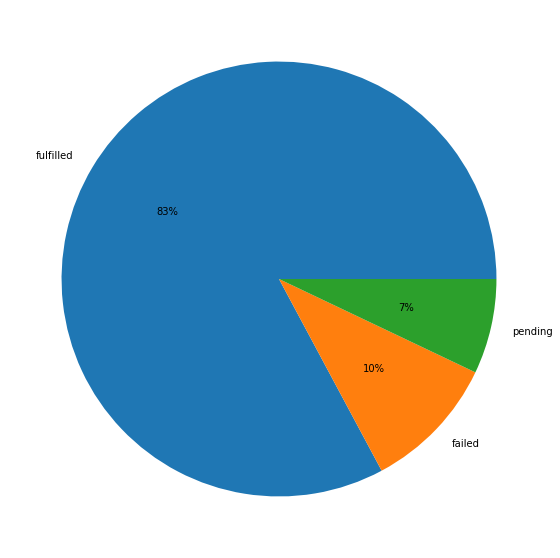

In [ ]:
# majority are fulfilled transaction
# similar weights between failed and pending
orderState = cust_transaction_details["orderState"].value_counts().reset_index()
orderState
plt.pie(orderState['orderState'], labels = orderState["index"], autopct='%.0f%%');

### Payment Method Provider

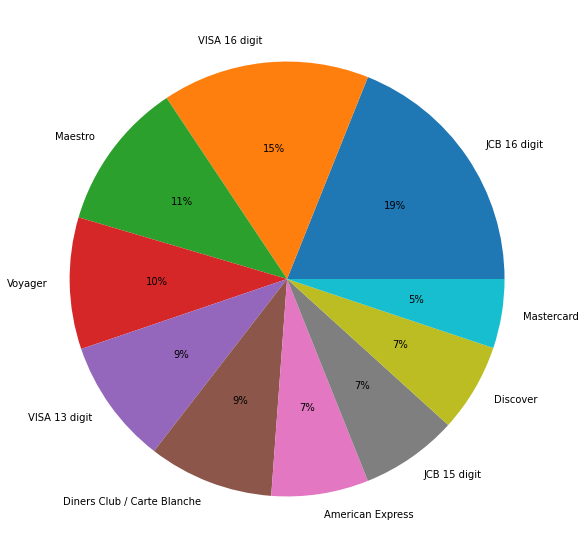

In [ ]:
paymentMethod = cust_transaction_details["paymentMethodProvider"].value_counts().reset_index()
paymentMethod
plt.pie(paymentMethod['paymentMethodProvider'], labels = paymentMethod["index"], autopct='%.0f%%');

### Payment Method Type

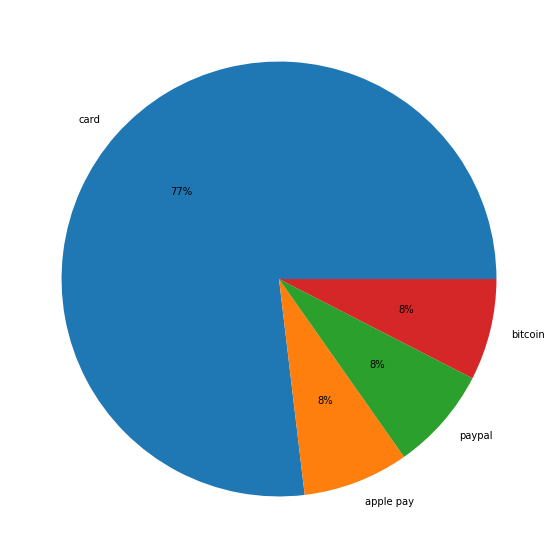

In [ ]:
paymentType = cust_transaction_details["paymentMethodType"].value_counts().reset_index()
paymentType
plt.pie(paymentType['paymentMethodType'], labels = paymentType["index"], autopct='%.0f%%');

### Transaction Failed

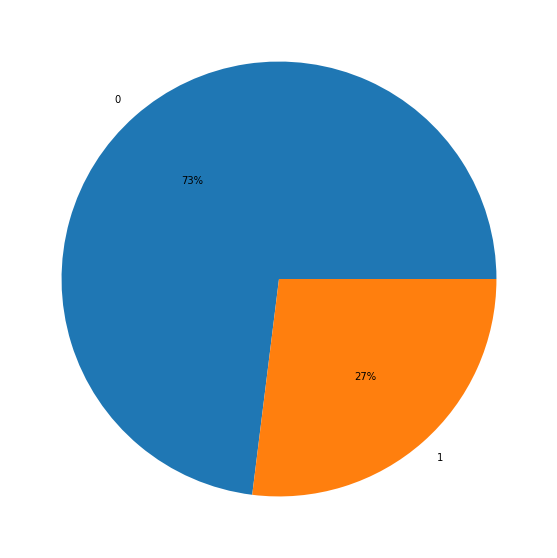

In [ ]:
transactionFailed = cust_transaction_details["transactionFailed"].value_counts().reset_index()
transactionFailed
plt.pie(transactionFailed['transactionFailed'], labels = transactionFailed["index"], autopct='%.0f%%');

### Order state distribution given transaction status 

order state distribution given failed transaction


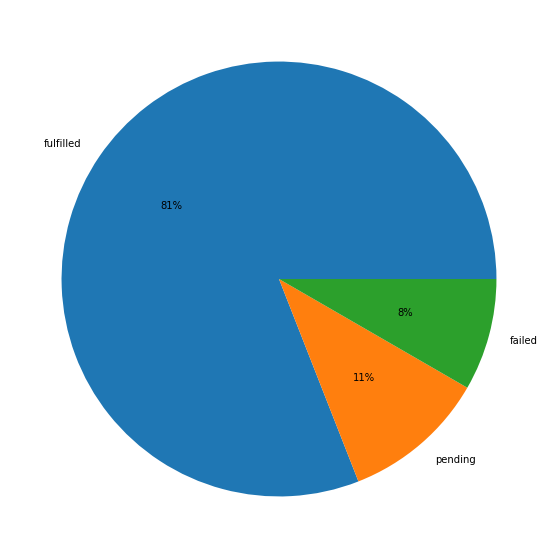

order state distribution given successful transaction


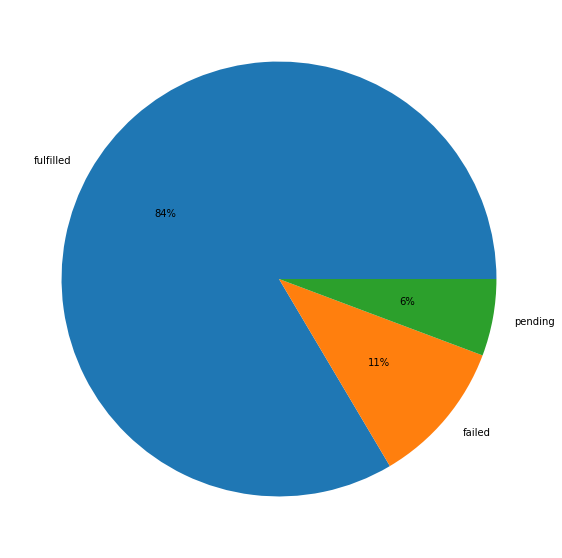

In [ ]:
order_trans = cust_transaction_details[["orderState", "transactionFailed"]].value_counts().reset_index()

# failed transaction distribution
order_trans_fail = order_trans[order_trans["transactionFailed"]==1]
plt.pie(order_trans_fail[0], labels = order_trans_fail["orderState"], autopct='%.0f%%')
print("order state distribution given failed transaction")
plt.show()
# successful transaction distribution
order_trans_success = order_trans[order_trans["transactionFailed"]==0]
plt.pie(order_trans_success[0], labels = order_trans_success["orderState"], autopct='%.0f%%')
print("order state distribution given successful transaction")
plt.show()

## Box plot

### Transaction Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


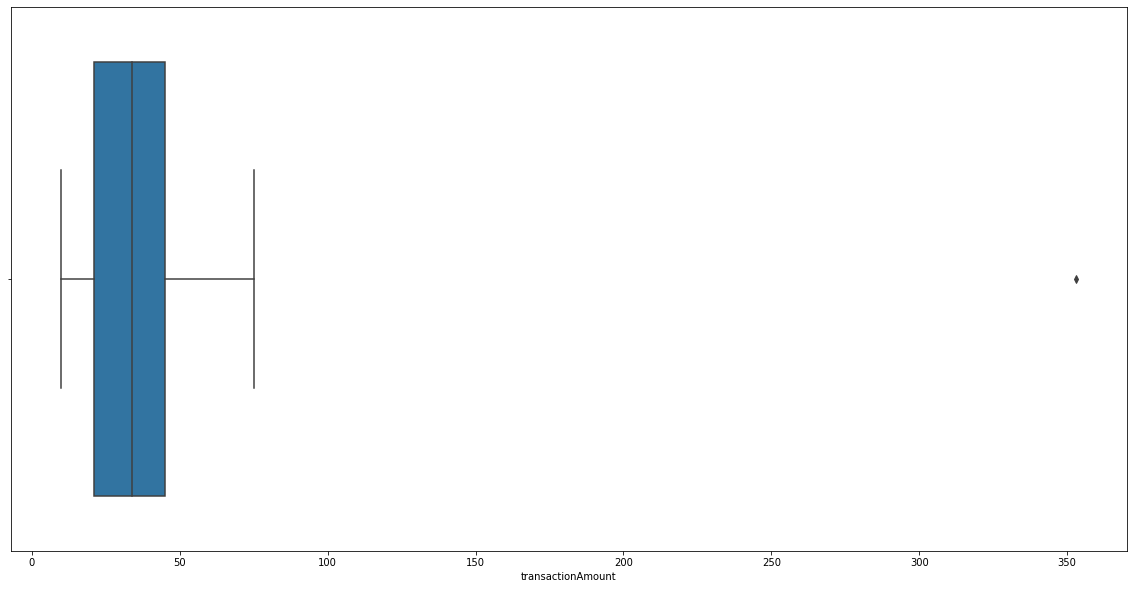

In [ ]:
# one outlier
sns.boxplot(cust_transaction_details['transactionAmount'])

### Order State vs Transaction Amount

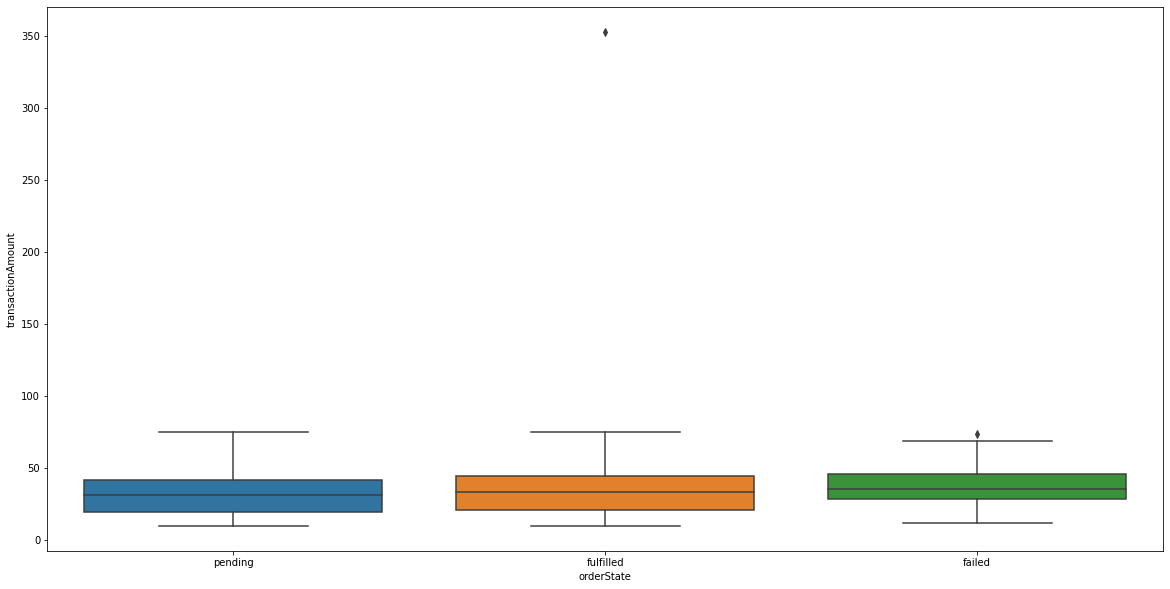

In [ ]:
sns.boxplot(x = cust_transaction_details['orderState'],
            y = cust_transaction_details['transactionAmount'])